In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

tf.test.is_gpu_available()

2.0.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.17.4
pandas 0.25.3
sklearn 0.22
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


False

In [5]:
fashion_mnist = keras.datasets.fashion_mnist # 这个会去“.keras的目录下去找数据”
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:] # 前5000当验证集，后面55000当训练集
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [6]:
print(np.max(x_train),np.min(x_train)) # 打印出归一化前的最大值和最小值
print(np.max(x_valid),np.min(x_valid))
print(np.max(x_test),np.min(x_test))

255 0
255 0
255 0


In [7]:
# 对数据进行归一化处理 ： x = (x-u) / std
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # 使用scaler来做数据归一化
# 归一化的使用先把x_train:[None,28,28] -> [None,784];然后归一化之后再把shape变回[None,28,28]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28) 
x_valid_scaled = scaler.fit_transform(
    x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled = scaler.fit_transform(
    x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [8]:
print(np.max(x_train_scaled),np.min(x_train_scaled))
print(np.max(x_valid_scaled),np.min(x_valid_scaled))
print(np.max(x_test_scaled),np.min(x_test_scaled))

2.0231433 -0.8105136
2.0143816 -0.80746
2.0234432 -0.81388575


In [9]:
# model 的另外一种写法
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

optimizer = keras.optimizers.Adam()
# 如果y是是一个one-hot向量，那么使用“categorical_crossentropy”，如果y是一个数，那么使用"sparse_categorical_crossentropy"
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer = optimizer,
              metrics = ["accuracy"])

In [12]:
# 定义callbacks : Tensorboard, earlystopping, ModelCheckpoint
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir, 
                                 'fashion_mnist_model.h5')
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    # save_best_only= True 保存最好的模型
    keras.callbacks.ModelCheckpoint(output_model_file,
                                   save_best_only= True),
    # earlystopping：monitor:关注的指标；默认是'val_loss'
    # min_delta:关注的指标变化小于这个阈值时可能需要earlystopping
    # patience: 一个数字，代表当发生多少次变化小于min_delta是我们要earlystopping
    keras.callbacks.EarlyStopping(min_delta=1e-3,patience=5)
]

# 开始训练:使用归一化的数据
history = model.fit(x_train_scaled,y_train,epochs=10,
          validation_data=(x_valid_scaled,y_valid),
          callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 3s 48us/sample - loss: 0.1997 - accuracy: 0.9246 - val_loss: 0.3438 - val_accuracy: 0.8902
Epoch 2/10
55000/55000 [==============================] - 3s 47us/sample - loss: 0.1919 - accuracy: 0.9253 - val_loss: 0.3653 - val_accuracy: 0.8902
Epoch 3/10
55000/55000 [==============================] - 3s 48us/sample - loss: 0.1828 - accuracy: 0.9299 - val_loss: 0.3597 - val_accuracy: 0.8938
Epoch 4/10
55000/55000 [==============================] - 3s 48us/sample - loss: 0.1755 - accuracy: 0.9339 - val_loss: 0.3416 - val_accuracy: 0.8956
Epoch 5/10
55000/55000 [==============================] - 3s 48us/sample - loss: 0.1683 - accuracy: 0.9355 - val_loss: 0.3942 - val_accuracy: 0.8932
Epoch 6/10
55000/55000 [==============================] - 3s 48us/sample - loss: 0.1622 - accuracy: 0.9381 - val_loss: 0.3809 - val_accuracy: 0.8922
Epoch 7/10
55000/55000 [==============================] -

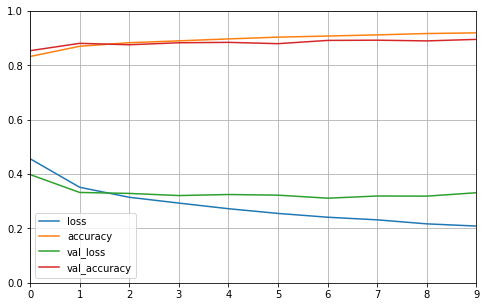

In [13]:
# 把值的变化过程打印出来
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)